In [ ]:
from keras.datasets import mnist

(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape) # 60000개, 28 * 28px 
print(Y_class_train.shape)
print(X_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


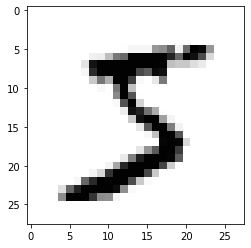

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [ ]:
import sys
# 코드로 확인
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')


0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [ ]:
# 2차원 배열 28*28 -> 1차원 배열 784
X_train = X_train.reshape(X_train.shape[0], 784)
X_train.shape

(60000, 784)

In [ ]:
# 정규화
X_train = X_train.astype('float64')
X_train = X_train/255

In [ ]:
# 테스트도 똑같이 적응
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255


In [ ]:
Y_class_train[0]

5

In [ ]:
# 원-핫 인코딩
from tensorflow.keras.utils import to_categorical

# 바이너리화 과정
Y_train = to_categorical(Y_class_train, 10) # 이부분이 책 코드와 다름
Y_test = to_categorical(Y_class_test, 10) 


In [ ]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# 딥러닝 프레임 임포트
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [ ]:
# 모델 설계하는 부분
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 

# 모델 최적화 설정
MODEL_DIR = '/content/drive/My Drive/Colab Notebooks/MNIST_model/' 
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

modelpath='/content/drive/My Drive/Colab Notebooks/MNIST_model/{epoch:02d}-{val_loss:.4f}.hdf5' 
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.15081, saving model to /content/drive/My Drive/Colab Notebooks/MNIST_model/01-0.1508.hdf5

Epoch 00002: val_loss improved from 0.15081 to 0.10630, saving model to /content/drive/My Drive/Colab Notebooks/MNIST_model/02-0.1063.hdf5

Epoch 00003: val_loss improved from 0.10630 to 0.08253, saving model to /content/drive/My Drive/Colab Notebooks/MNIST_model/03-0.0825.hdf5

Epoch 00004: val_loss improved from 0.08253 to 0.07847, saving model to /content/drive/My Drive/Colab Notebooks/MNIST_model/04-0.0785.hdf5

Epoch 00005: val_loss improved from 0.07847 to 0.07681, saving model to /content/drive/My Drive/Colab Notebooks/MNIST_model/05-0.0768.hdf5

Epoch 00006: val_loss improved from 0.07681 to 0.06735, saving model to /content/drive/My Drive/Colab Notebooks/MNIST_model/06-0.0674.hdf5

Epoch 00007: val_loss did not improve from 0.06735

Epoch 00008: val_loss improved from 0.06735 to 0.06099, saving model to /content/drive/My Drive/Colab Notebooks

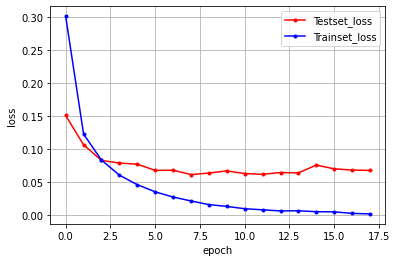

In [ ]:
import numpy

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


313/313 [==============================] - 1s 3ms/step - loss: 0.0674 - accuracy: 0.9825

 Test Accuracy: 0.9825
